# **Exploratory Data Analysis of Drug Review Dataset**

## **The source dataset for this project model is given below:-**
https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [4]:
from zipfile import ZipFile

with ZipFile('drugsCom_raw.zip', 'r') as zip_object:
  zip_object.extractall()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from textblob import TextBlob
%matplotlib inline


In [6]:
df = pd.read_csv('drugsComTrain_raw.tsv',sep='\t')
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [7]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### **Drug Names given in Dataset**

In [9]:
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [10]:
# Number of drugs in the list
len(df['drugName'].unique().tolist())

3436

In [11]:
# Most popular to least popular drug list
df['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

### **Top 20 Most Popular Drugs**

In [12]:
# Top 20 most popular drugs
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

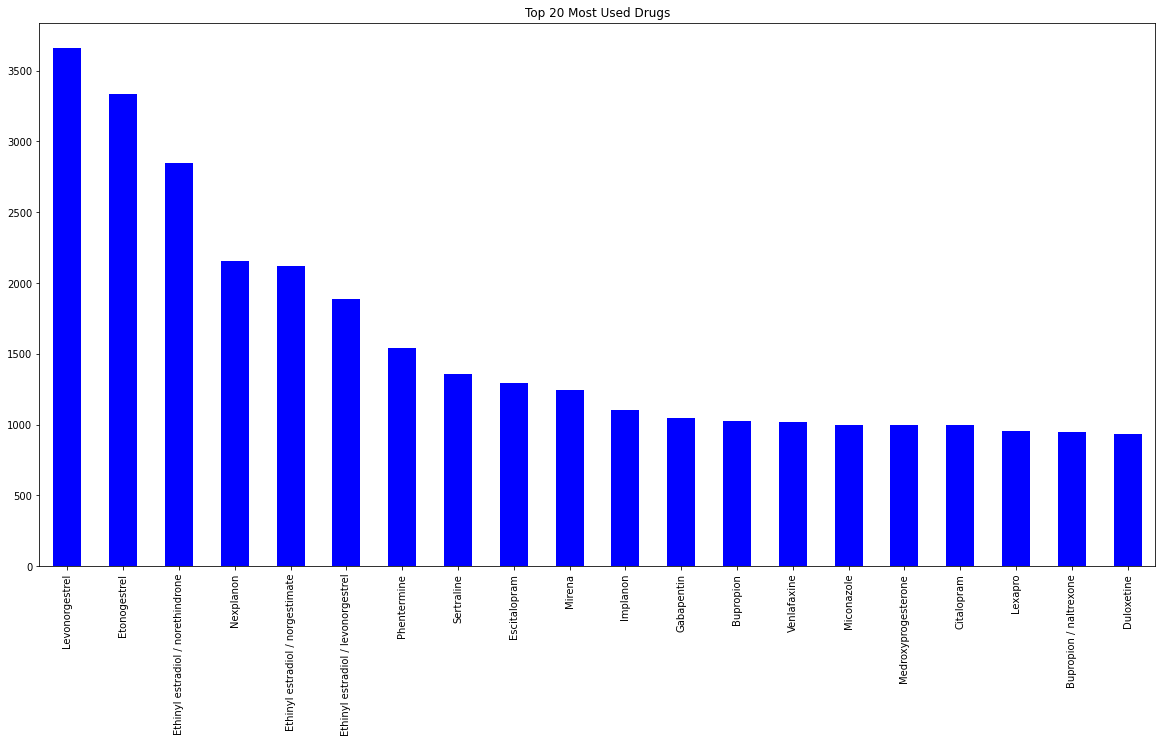

In [13]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar',color='blue')
plt.title('Top 20 Most Used Drugs')
plt.show()

### **Least 20 Used Drugs**

In [14]:
df['drugName'].value_counts().nsmallest(20)

Clemastine                         1
Topicort LP                        1
Smoothie Readi-Cat 2               1
Ipratropium Inhalation Solution    1
Olux-E                             1
Hexachlorophene                    1
Pedi-Dri                           1
Ginseng                            1
Lincocin                           1
EnLyte                             1
Tums Smoothies                     1
Purinethol                         1
Aldomet                            1
Midol Extended Relief              1
Travel-Eze                         1
Ponatinib                          1
Wal-finate                         1
Ciclodan                           1
Niacinamide                        1
Fragmin                            1
Name: drugName, dtype: int64

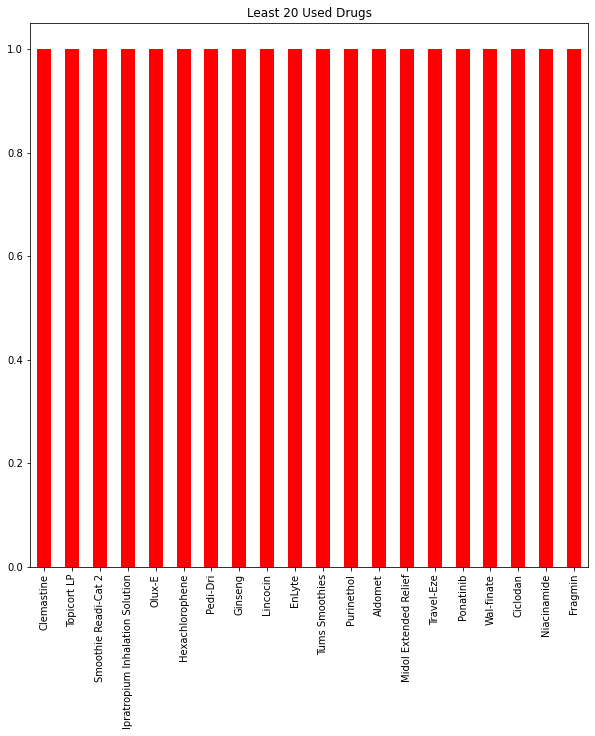

In [15]:
plt.figure(figsize=(10,10))
df['drugName'].value_counts().nsmallest(20).plot(kind='bar',color='red')
plt.title('Least 20 Used Drugs')
plt.show()

### **Group/Classification of Drugs**

In [16]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [17]:
def classify_drug(drugname):
  for i in drug_suffix:
    if drugname.endswith(i):
      return(drug_suffix[i])

In [18]:
classify_drug('Sulsartan')

'arb blocker'

In [19]:
df['drug_class'] = df['drugName'].apply(classify_drug)
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [20]:
# Number of groups of drugs by class in the dataset
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [21]:
# Most common Class of drugs to Least common 
df['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

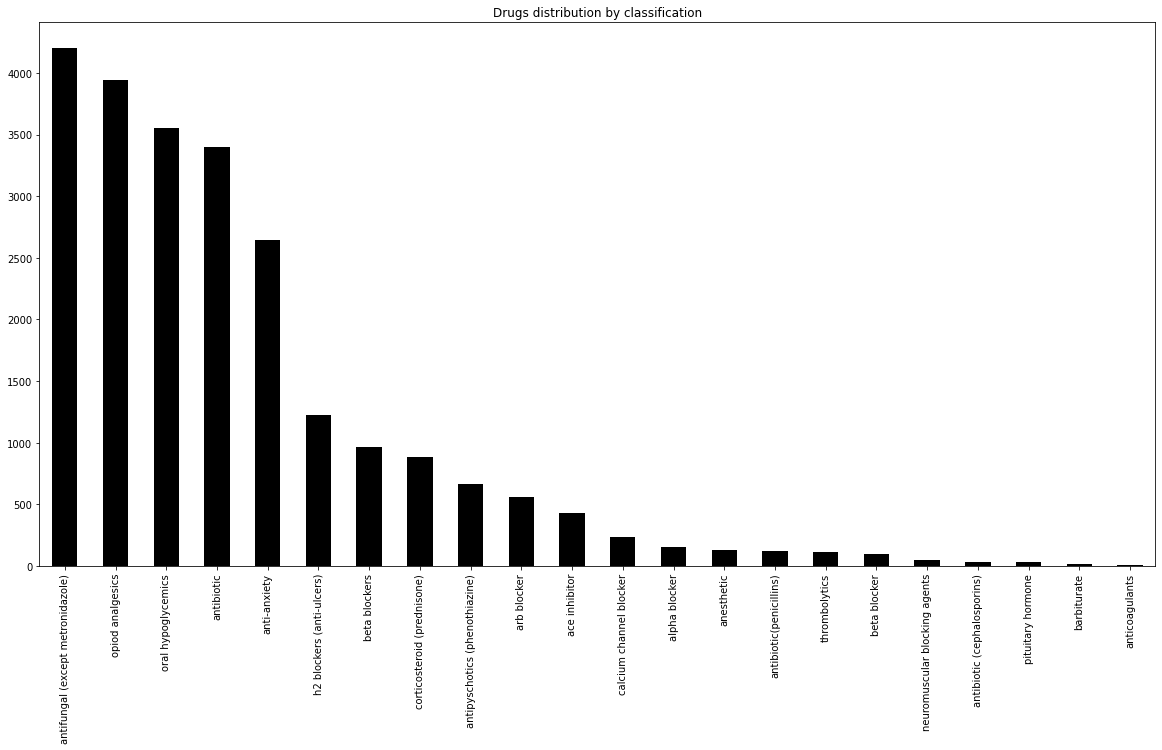

In [22]:
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar',color='black')
plt.title('Drugs distribution by classification')
plt.show()

### **Number of Conditions**

In [23]:
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [24]:
len(df['condition'].unique().tolist())

885

In [25]:
# Distribution of Conditions
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

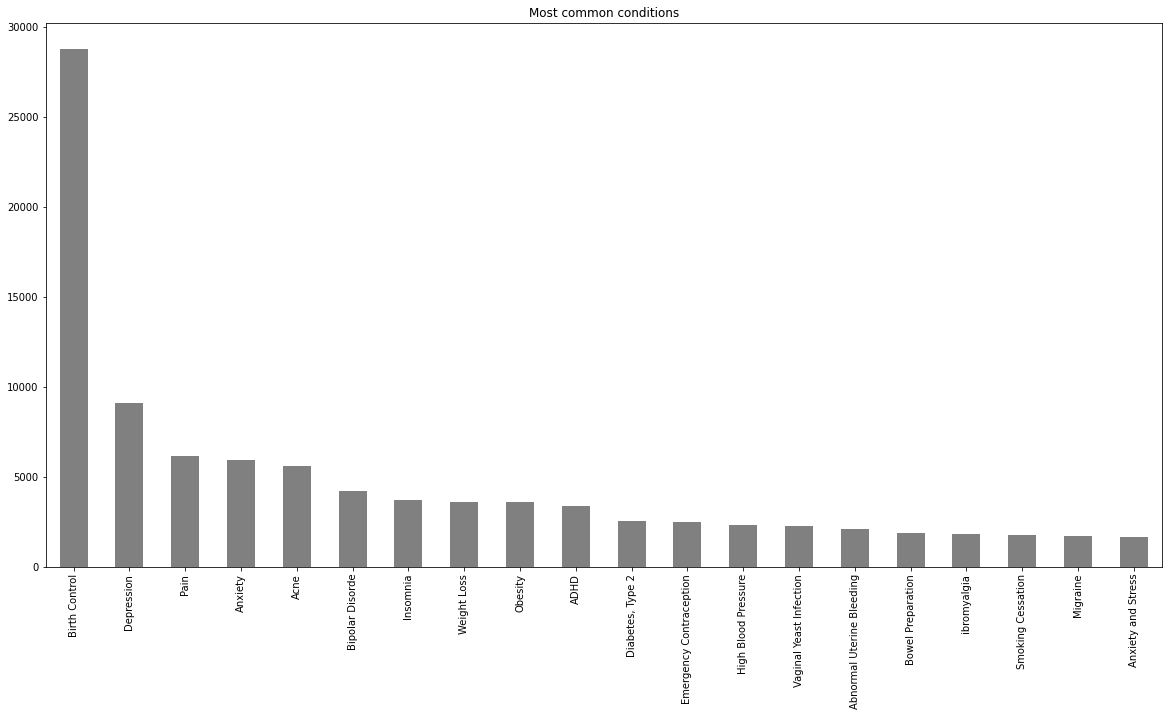

In [26]:
# Top 20 Most Common Conditions
plt.figure(figsize=(20,10))
df['condition'].value_counts().nlargest(20).plot(kind='bar',color='grey')
plt.title('Most common conditions')
plt.show()


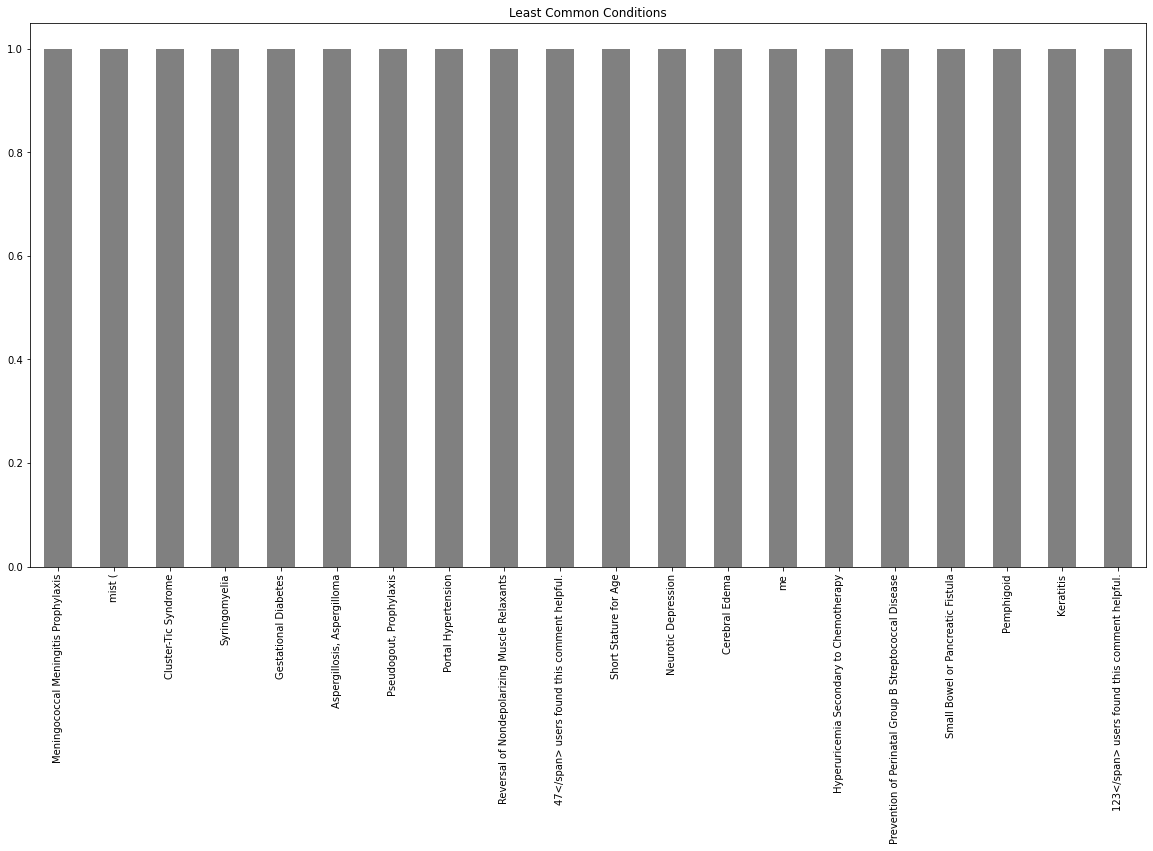

In [27]:
# Least 20 Conditions
plt.figure(figsize=(20,10))
df['condition'].value_counts().nsmallest(20).plot(kind='bar',color='grey')
plt.title('Least Common Conditions')
plt.show()

### **Drugs Per Condition Review**

In [28]:
df.groupby('condition')['drugName'].size()

condition
0</span> users found this comment helpful.      104
10</span> users found this comment helpful.      28
110</span> users found this comment helpful.      1
11</span> users found this comment helpful.      10
121</span> users found this comment helpful.      1
                                               ... 
unctional Gastric Disorde                         1
ungal Infection Prophylaxis                       1
ungal Pneumonia                                   1
von Willebrand's Disease                          7
zen Shoulde                                      14
Name: drugName, Length: 884, dtype: int64

In [29]:
# Top 20 Drugs per Condition
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

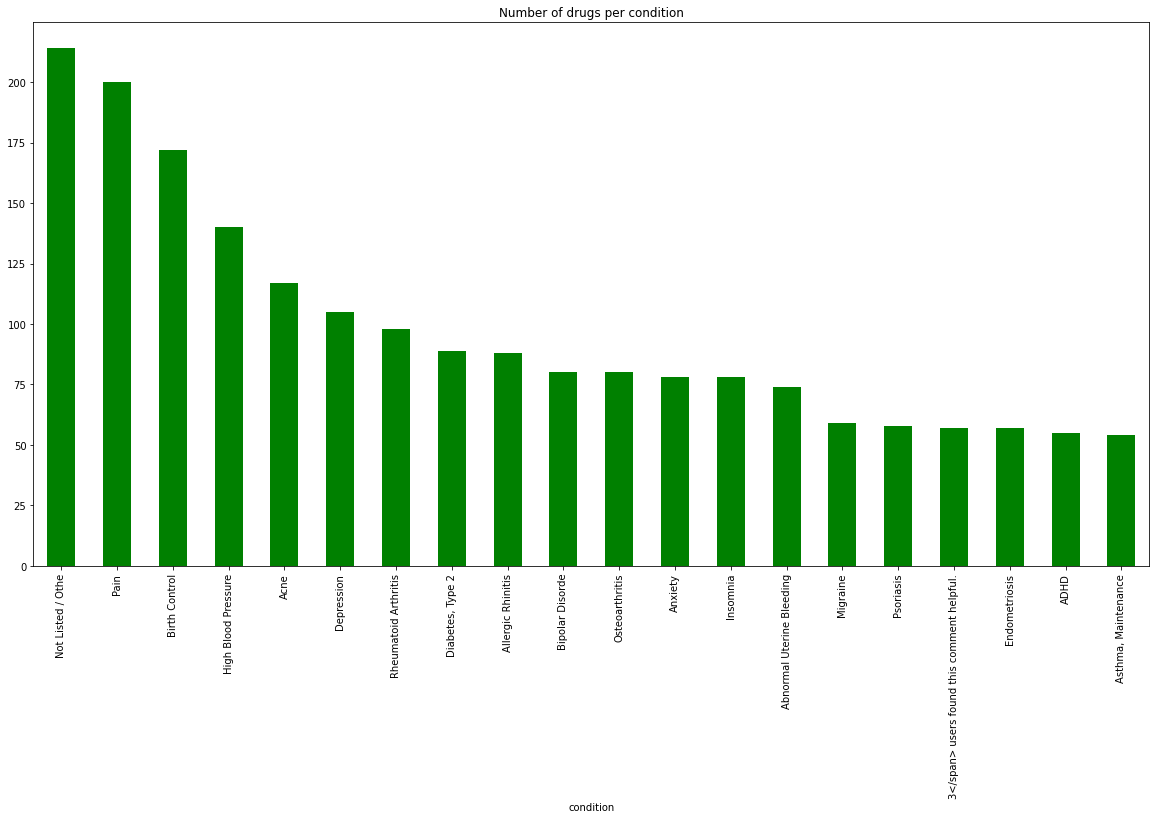

In [30]:
plt.figure(figsize=(20,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar',color='green')
plt.title('Number of drugs per condition')
plt.show()


### **Distribution of Drugs per Drug Group based on size**

In [31]:
drug_groups = df.groupby('drug_class').size()
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


In [32]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
drug_groups_df

,drug_class,counts
0,ace inhibitor,432
1,alpha blocker,153
2,anesthetic,129
3,anti-anxiety,2645
4,antibiotic,3401
5,antibiotic (cephalosporins),29
6,antibiotic(penicillins),119
7,anticoagulants,9
8,antifungal (except metronidazole),4201
9,antipyschotics (phenothiazine),664


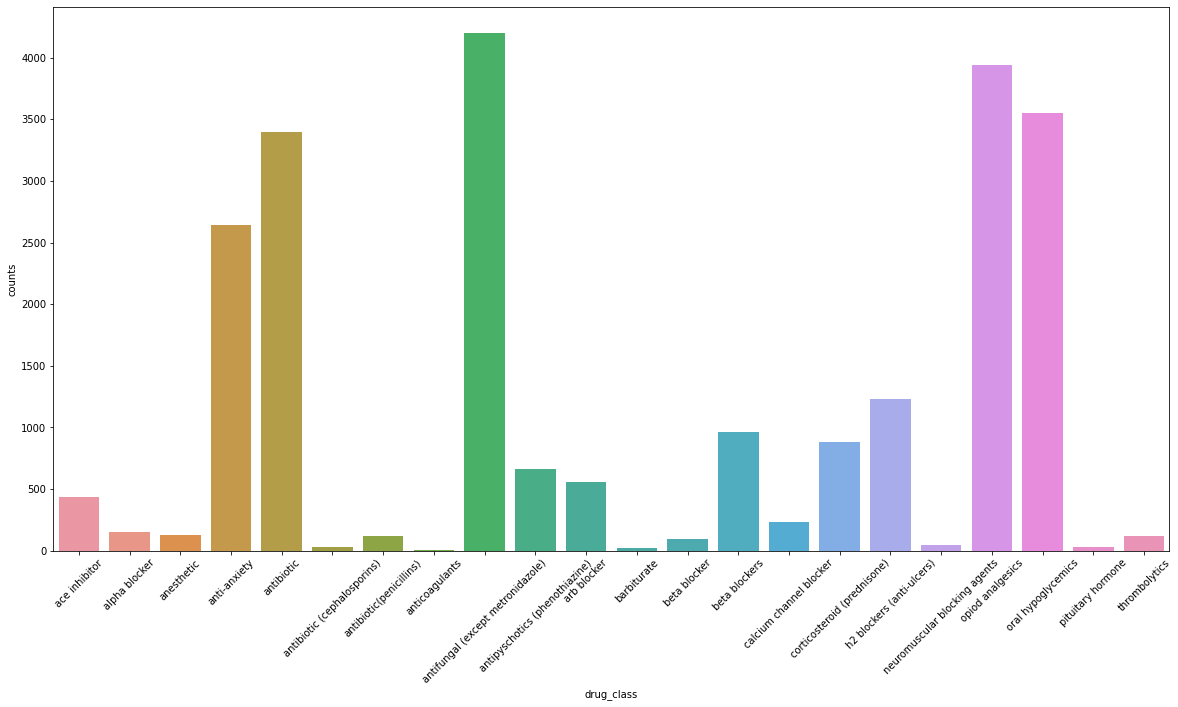

In [33]:
plt.figure(figsize=(20,10))
dg = sb.barplot(x='drug_class',y='counts',data=drug_groups_df)
plt.xticks(rotation=45)
plt.show()

### **Rating Data**

In [34]:
df['rating']

0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161297, dtype: float64

In [35]:
# Distribution of Rating by Size
df.groupby('rating').size()

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

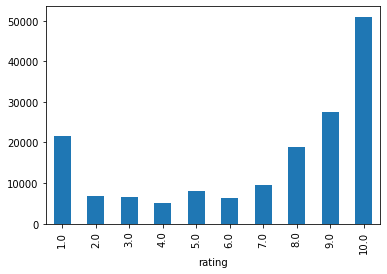

In [36]:
df.groupby('rating').size().plot(kind='bar')

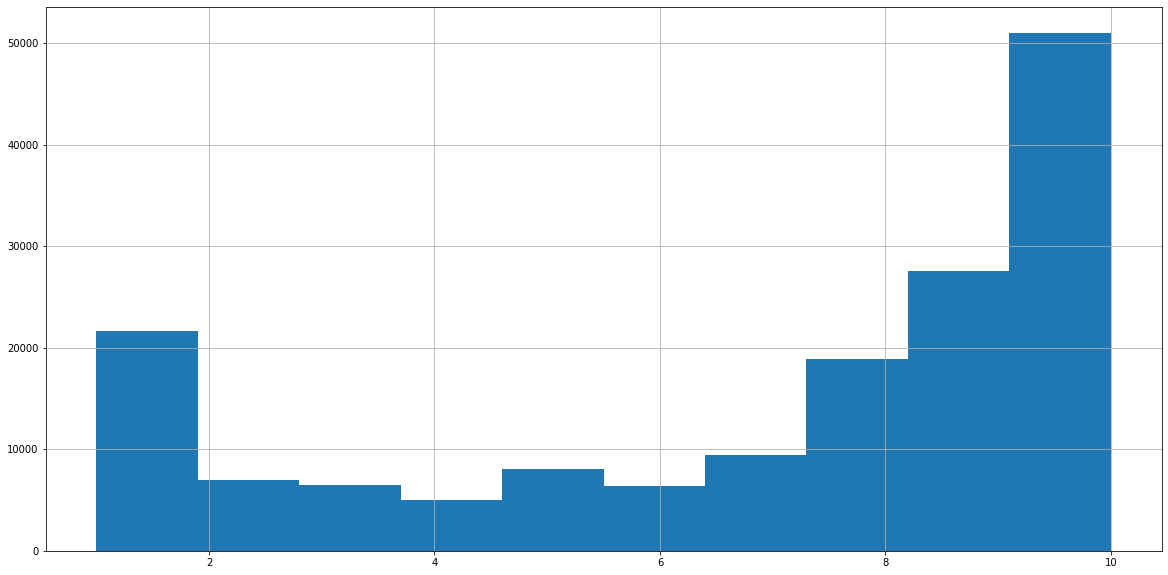

In [37]:
# By Histogram
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.show()

In [38]:
#Average rating of drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

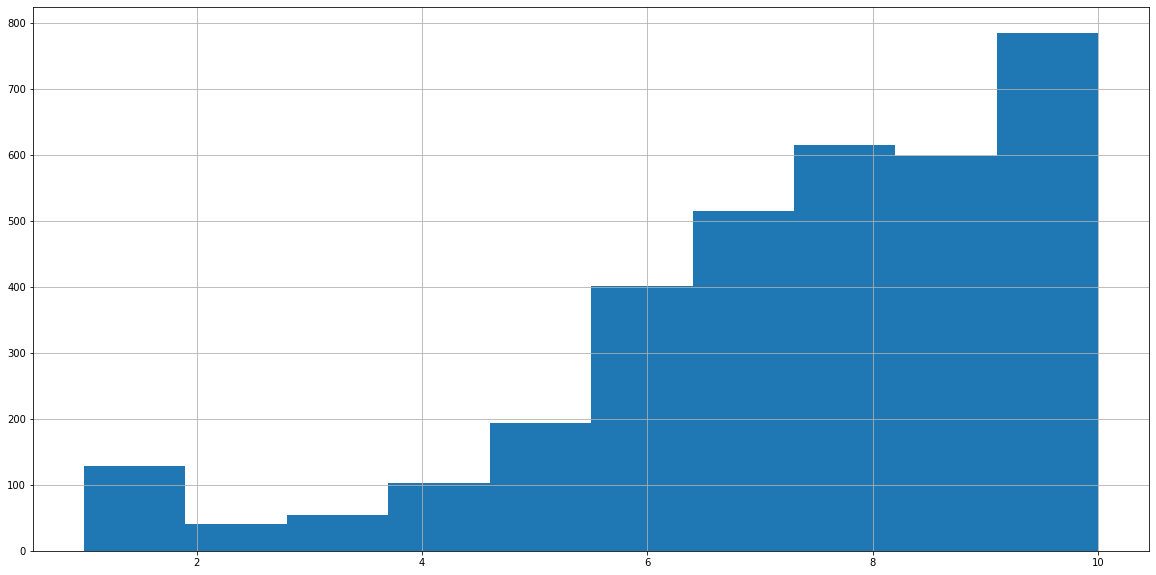

In [39]:
# Average rating for all drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.show()

In [40]:
# Average rating of drugs by class
avg_rating_class = (df['rating'].groupby(df['drug_class']).mean())
avg_rating_class

drug_class
ace inhibitor                        5.759259
alpha blocker                        6.954248
anesthetic                           5.937984
anti-anxiety                         8.543667
antibiotic                           6.500735
antibiotic (cephalosporins)          6.344828
antibiotic(penicillins)              7.033613
anticoagulants                       9.222222
antifungal (except metronidazole)    5.580100
antipyschotics (phenothiazine)       7.146084
arb blocker                          6.464286
barbiturate                          8.894737
beta blocker                         6.587629
beta blockers                        7.681159
calcium channel blocker              5.725322
corticosteroid (prednisone)          7.477427
h2 blockers (anti-ulcers)            7.280945
neuromuscular blocking agents        8.622222
opiod analgesics                     7.446388
oral hypoglycemics                   7.268917
pituitary hormone                    8.500000
thrombolytics          

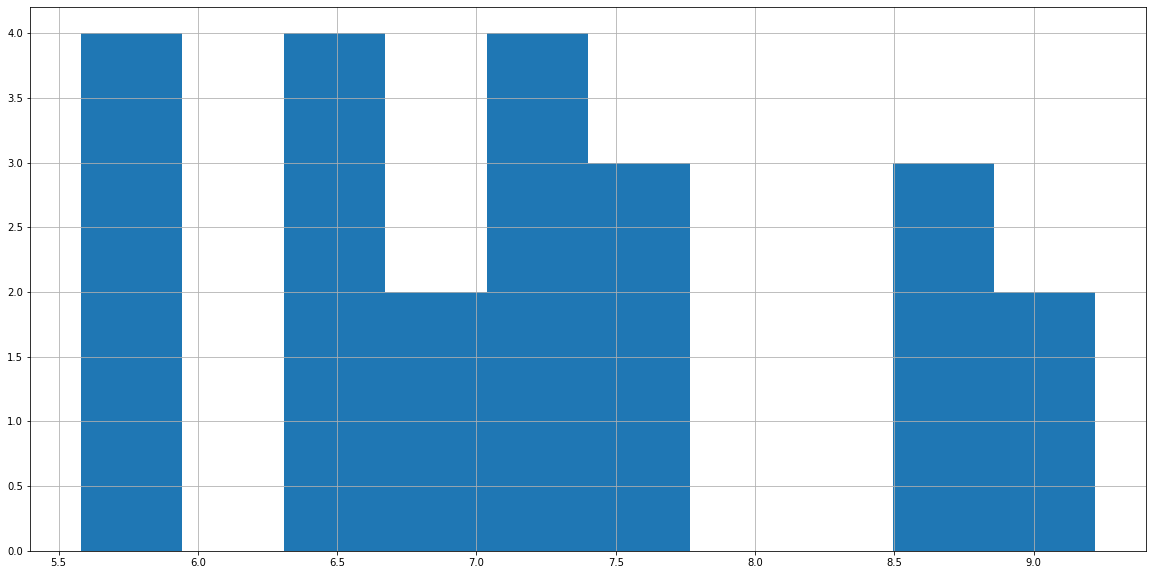

In [41]:
plt.figure(figsize=(20,10))
avg_rating_class.hist()
plt.show()

### **Sentimental Analysis**

In [42]:
# Sentimental Analysis
from textblob import TextBlob

In [43]:
df['review']

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [44]:
# Review Genuinity

def get_sentimental(text):
  blob = TextBlob(text)
  return blob.polarity

def get_sentimental_label(text):
  blob = TextBlob(text)
  if blob.polarity > 0:
    result = 'Positive'
  elif blob.polarity < 0:
    result = 'Negative'
  else:
    result = 'Neutral'
  return result

In [45]:
get_sentimental('My name is Anujbhai')

0.0

In [46]:
get_sentimental_label('My name is Anujbhai')

'Neutral'

In [47]:
# Sentimental Score for review
df['sentimental'] = df['review'].apply(get_sentimental)
df['sentimental']

0         0.000000
1         0.168333
2         0.067210
3         0.179545
4         0.194444
            ...   
161292    0.262917
161293   -0.276389
161294   -0.223810
161295    0.212597
161296    0.085417
Name: sentimental, Length: 161297, dtype: float64

In [48]:
# Sentimental Label for review
df['sentimental_label'] = df['review'].apply(get_sentimental_label)
df['sentimental_label']

0          Neutral
1         Positive
2         Positive
3         Positive
4         Positive
            ...   
161292    Positive
161293    Negative
161294    Negative
161295    Positive
161296    Positive
Name: sentimental_label, Length: 161297, dtype: object

In [49]:
df[['review','sentimental','sentimental_label']]

,review,sentimental,sentimental_label
0,"""It has no side effect, I take it in combinati...",0.000000,Neutral
1,"""My son is halfway through his fourth week of ...",0.168333,Positive
2,"""I used to take another oral contraceptive, wh...",0.067210,Positive
3,"""This is my first time using any form of birth...",0.179545,Positive
4,"""Suboxone has completely turned my life around...",0.194444,Positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,Positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,Negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,Negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,Positive


In [50]:
# Number of Positive, Negative & Neutral Reviews
df['sentimental_label'].value_counts()

Positive    101041
Negative     53303
Neutral       6953
Name: sentimental_label, dtype: int64

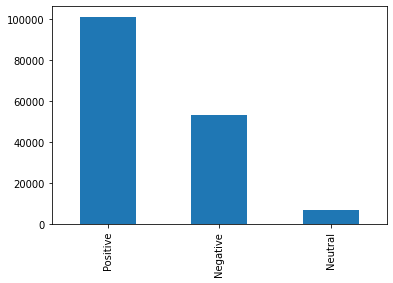

In [51]:
df['sentimental_label'].value_counts().plot(kind='bar')

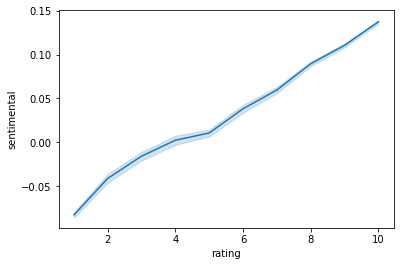

In [52]:
# Correlation between Sentiment & Rating
sb.lineplot(data=df,x='rating',y='sentimental')
plt.show()

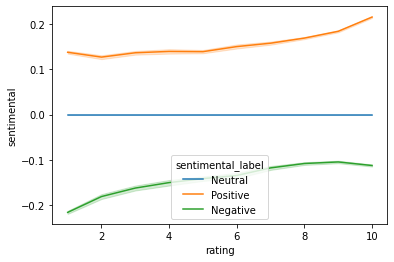

In [53]:
# Correlation between Sentiment & Rating
sb.lineplot(data=df,x='rating',y='sentimental',hue='sentimental_label')
plt.show()

In [54]:
# Genuine Good Rating Per Review
good_review = df[(df['rating'] >= 6) & (df['sentimental_label'] == 'Positive')]
good_review

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentimental,sentimental_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,Positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazole),0.074107,Positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,Positive
...,...,...,...,...,...,...,...,...,...,...
161284,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9.0,"November 10, 2016",25,None,0.153125,Positive
161288,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8.0,"January 21, 2015",22,None,0.155556,Positive
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125,None,0.262917,Positive
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79,None,0.212597,Positive


In [55]:
# Genuine Bad Rating Per Review
bad_review = df[(df['rating'] <= 4) & (df['sentimental_label'] == 'Negative')]
bad_review

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentimental,sentimental_label
12,191290,Pentasa,Crohn's Disease,"""I had Crohn&#039;s with a resection 30 years ...",4.0,"July 6, 2013",8,None,-0.106667,Negative
13,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4.0,"September 7, 2017",1,None,-0.036574,Negative
33,214453,Tioconazole,Vaginal Yeast Infection,"""The burning is out of control about 20 minute...",1.0,"September 11, 2015",2,antifungal (except metronidazole),-1.000000,Negative
36,125343,Dulcolax,Constipation,"""SO MUCH PAIN! \r\nIn the last 2 years I have ...",1.0,"February 13, 2016",10,None,-0.149548,Negative
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3,None,-0.136508,Negative
...,...,...,...,...,...,...,...,...,...,...
161275,161838,Ciprofloxacin,Bladder Infection,"""POISON....two days on this med &amp; I though...",1.0,"November 28, 2017",1,antibiotic,-0.381250,Negative
161283,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3.0,"July 25, 2016",5,None,-0.139125,Negative
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33,None,-0.100694,Negative
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34,oral hypoglycemics,-0.276389,Negative


### **Useful Count Data**

In [56]:
df['usefulCount']

0          27
1         192
2          17
3          10
4          37
         ... 
161292    125
161293     34
161294     35
161295     79
161296    116
Name: usefulCount, Length: 161297, dtype: int64

### **Drugs per Useful Count**

In [57]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [58]:
# Top Drugs per usefulCount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64

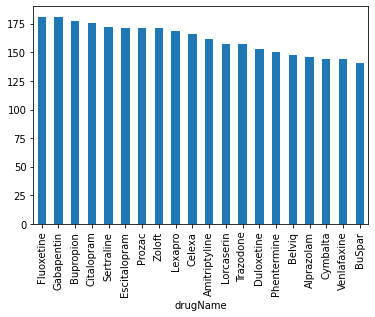

In [59]:
# Top 20 Drugs per Useful Count
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')

### **Drug Class per Useful Count**

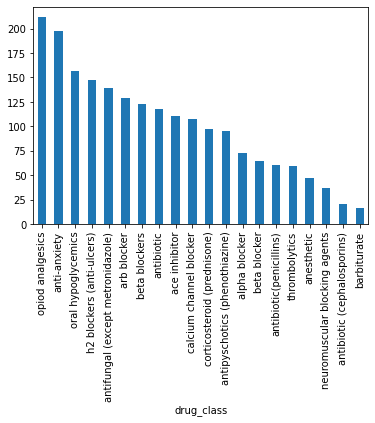

In [60]:
# Top Drug Class per Count
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20).plot(kind='bar')

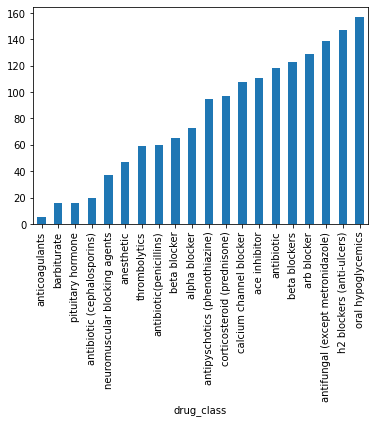

In [61]:
# Least Drug Class per Count
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')

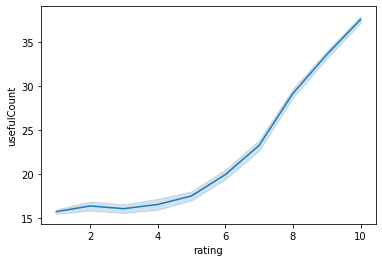

In [62]:
# Correlation between Rating and Usefulcount
sb.lineplot(data=df,x='rating',y='usefulCount')

### **Rating per Year**

In [63]:
# Rating per year
df.groupby('date')['rating'].size()

date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

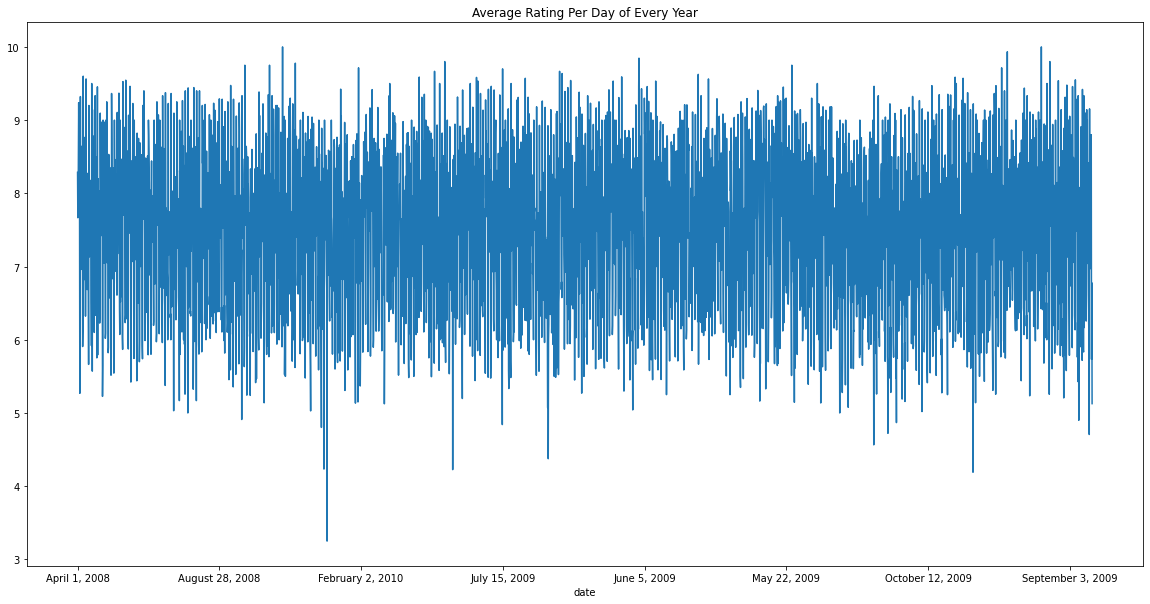

In [64]:
# Average Rating Per Day of Every Year
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average Rating Per Day of Every Year")
plt.show()

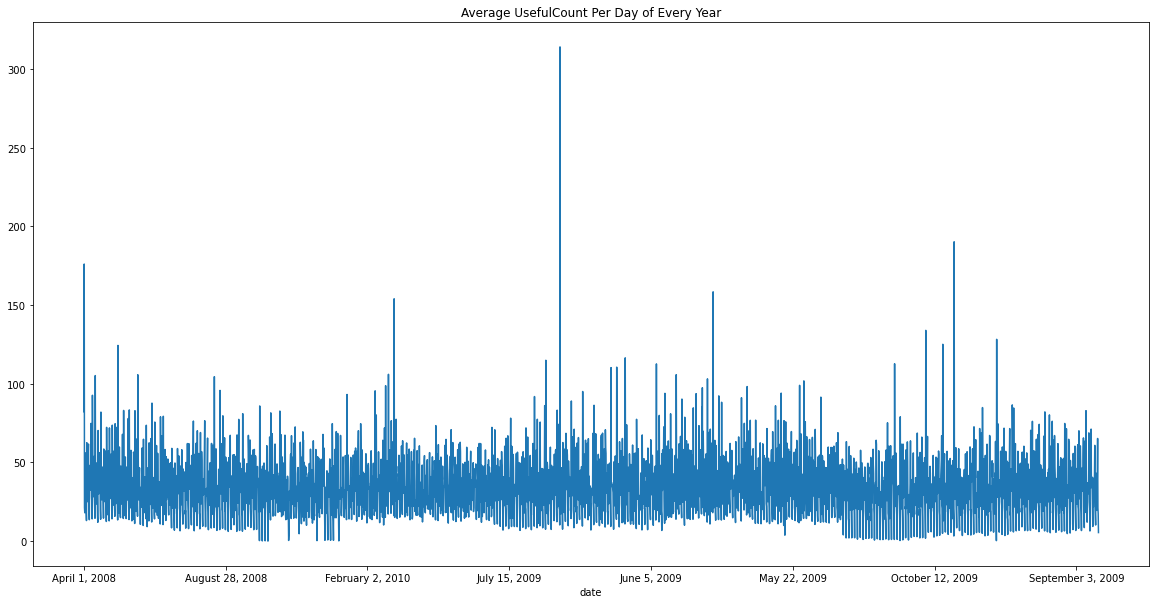

In [65]:
# Average Useful Count per day of every year
df.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Average UsefulCount Per Day of Every Year")
plt.show()

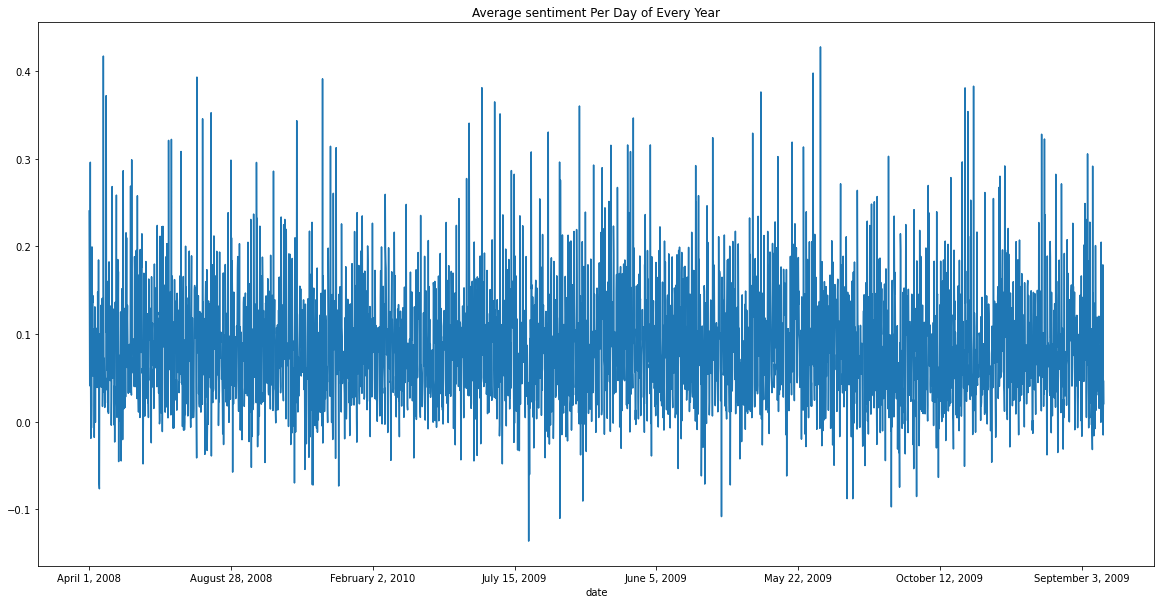

In [66]:
# Average Sentimental Count per day of every year
df.groupby('date')['sentimental'].mean().plot(figsize=(20,10))
plt.title("Average sentiment Per Day of Every Year")
plt.show()

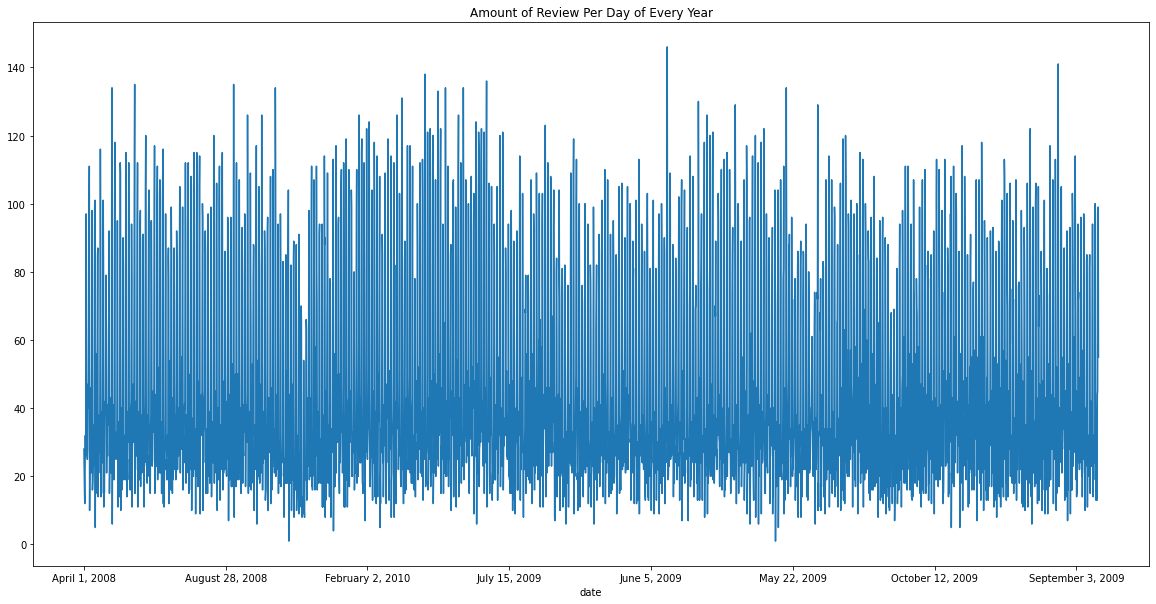

In [67]:
# Amount of review per day of every year
df.groupby('date')['review'].size().plot(figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

In [68]:
grouped_date = df.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})
grouped_date

,rating,usefulCount,review
date,,,
"April 1, 2008",8.285714,2303,28
"April 1, 2009",7.666667,3698,21
"April 1, 2010",7.812500,342,16
"April 1, 2011",8.583333,216,12
"April 1, 2012",9.238095,1178,21
...,...,...,...
"September 9, 2013",8.295455,1941,44
"September 9, 2014",8.800000,2935,45
"September 9, 2015",5.733333,1901,90


In [69]:
grouped_date.index

Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2011',
       'April 1, 2012', 'April 1, 2013', 'April 1, 2014', 'April 1, 2015',
       'April 1, 2016', 'April 1, 2017',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3579)

In [70]:
grouped_date['date'] = grouped_date.index

In [71]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])

In [72]:
grouped_date.dtypes

rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [73]:
grouped_date = grouped_date.set_index('date')

<ipython-input-74-6d3d4f4b46ac>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008'].plot()


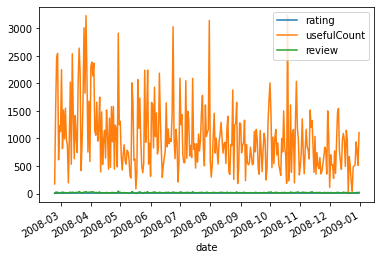

In [74]:
# Select A Particular Date Range
grouped_date['2008'].plot()

<ipython-input-75-3668559b14fa>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008']['review'].plot()


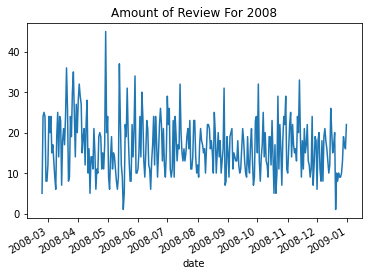

In [75]:
# Amount of Review for 2008
grouped_date['2008']['review'].plot()
plt.title("Amount of Review For 2008")
plt.show()

<ipython-input-76-6ff4f278b10a>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2009']['review'].plot()


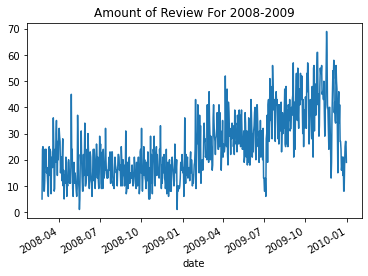

In [76]:
grouped_date['2008':'2009']['review'].plot()
plt.title("Amount of Review For 2008-2009")
plt.show()

<ipython-input-77-e42a3b015d4f>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2009']['rating'].plot()


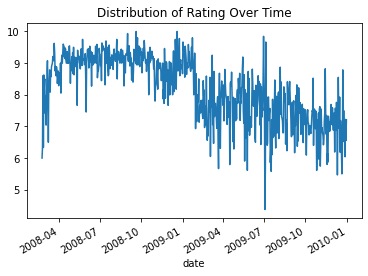

In [77]:
# Distribution of Rating Over Time
grouped_date['2008':'2009']['rating'].plot()
plt.title("Distribution of Rating Over Time")
plt.show()

<ipython-input-78-42f01264eb77>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2012']['rating'].plot(figsize=(20,10))


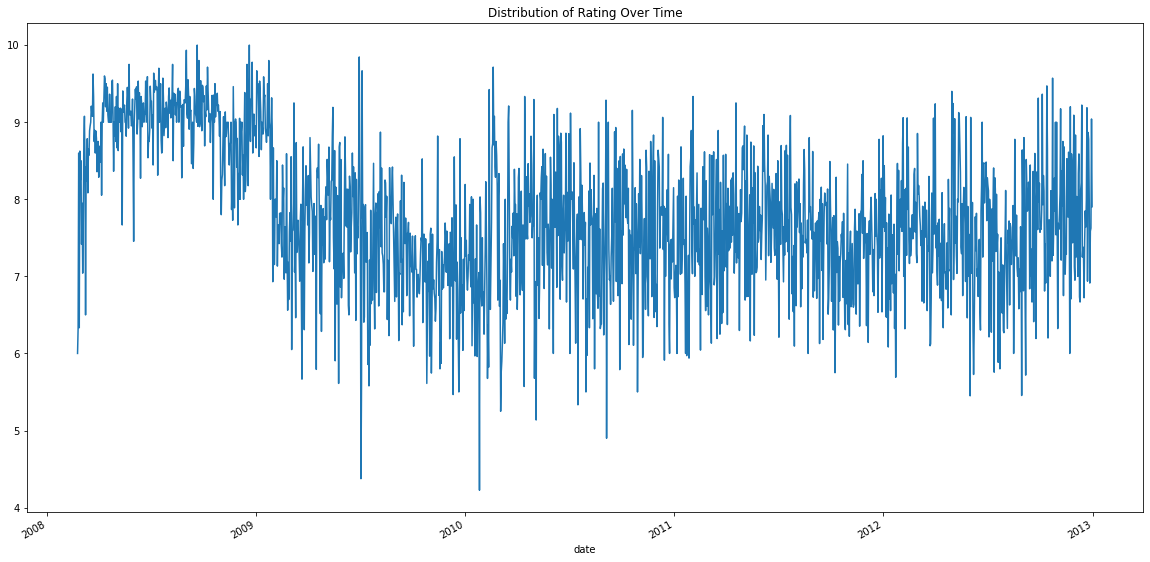

In [78]:
# Distribution of Rating Over Time
grouped_date['2008':'2012']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over Time")
plt.show()

<ipython-input-79-3b857e02acc0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008-04'].plot()


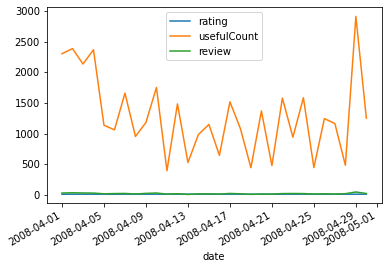

In [79]:
grouped_date['2008-04'].plot()

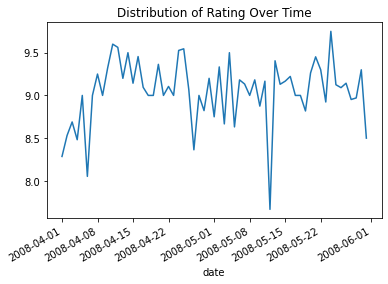

In [80]:
# Distribution of Rating Over A Month
grouped_date['2008-4':'2008-5']['rating'].plot()
plt.title("Distribution of Rating Over Time")
plt.show()

In [81]:
df.to_csv("drug_review_dataset_with_sentiment.csv",index=False)
